# ES6 Classes

In previous sections, we learned about objects and prototypical inheritance. Since ES6 (also known as ES2015), JavaScript introduced a new way to create objects and implement inheritance using classes. However, these classes are not like the classes we see in languages like C# or Java. Instead, they are essentially **syntactic sugar** over JavaScript's existing **prototypical inheritance model** ( Constructor Functions ).

In [ ]:
// Before ES6

function Circle(radius){
    this.radius = radius;

    this.draw = function() {
        console.log('draw');
    }
}

In [ ]:
// ES6 Class Syntax

class Circle{
    constructor(radius) {
        this.radius = radius;

        // Regular method
        this.move = function() {
            console.log('move');
        }
    }

    // Added method to the prototype
    draw() {
        console.log('draw');
    }
}

const c = new Circle(1);

In ES6, functions defined **inside the class body (but outside the constructor)** are automatically added to the **prototype** of the class.
However, functions defined **inside the constructor** are treated as **regular instance methods**, meaning each object gets its own copy of the function.

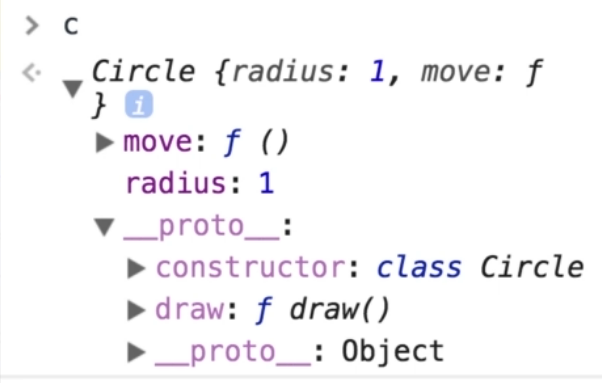

In [3]:
console.log(typeof Circle);

function


In JavaScript, **classes are essentially functions**. In fact, a class is just a special type of **constructor function** under the hood. When you define a class using the class keyword, JavaScript translates it into a constructor function that uses **prototypal inheritance**.

# Hoisting

First refer, the `Function Declaration vs Expression` and `Hoisting` in `007-Function` Note in `001-Fundamentals` Section

In [ ]:
// class Declaration
class Circle {    
}


// class Expression
const square = class {    
}

Unlike function declarations, `class declarations` are `not hoisted` to the top.

# Static Methods

In classical OOP languages, We havee two types of methods. `Instance methods` and `static methods`.

`Instance methods` are available on instances of a class, which are objects. In contrast, `static methods` are available on the class itself, not on its instances. They are often used to create utility functions that are not specific to any particular object

In [1]:
class Circle {
    constructor(radius) {
        this.radius = radius;
    }

    // Instance Methods
    draw() {
        console.log('draw');
    }

    // Static Methods
    static parse(str) {
        const radius = JSON.parse(str).radius;
        return new Circle(radius);
    }
}

// Static Method Usage
const circle = Circle.parse('{"radius": 1}');
console.log(circle);

Circle { radius: 1 }


Another example is the `Math` class in JavaScript. It contains many utility methods, all of which are static because we call them using the class name

# The This Keyword

First refer, the `The This Keyword` and `Changing This` in `007-Function` Note in `001-Fundamentals` Section

In [ ]:
const Circle1 = function(){
    this.draw = function() {
        console.log(this);
    }
}

const c = new Circle1();

// Method Call
c.draw();  // Logs the Circle1 instance

const drawFunc = c.draw; // This creates a reference to the method without binding it to the Circle1 instance

// Function Call
drawFunc();  // Logs undefined or global object (in non-strict mode) because 'this' is not bound to the Circle1 instance

When we call `c.draw()`, it's a **method call**, so `this` refers to the object `c`.

However, when we assign `c.draw` to `drawFunc` and then call `drawFunc()`, it's a **regular function call**. In this case, `this` refers to the **global object** (window in browsers) because there's no object context.

So, in JavaScript:

- In a **method** call, `this` refers to the object that owns the method. 

- In a **regular function** call, `this` refers to the global object (or `undefined` in strict mode).

When we create an object using the `new` operator, it creates a new object and sets `this` inside the constructor function to refer to that new object. Also, if we forget to use the `new` keyword when calling a constructor function, `this` will refer to the global object instead of a new object.

#### Extra - 

In JavaScript, there is a mode called **strict mode**. When we enable it, the JavaScript engine becomes more strict and does extra error checking. Errors that would normally fail silently are turned into exceptions.

Strict mode also changes the behavior of the `this` keyword. In regular functions, `this` normally refers to the global object (like `window`). But in strict mode, `this` will be `undefined` if the function is called without an object context.

This helps prevent us from accidentally changing the global object.


#### this in ES6 Classes

In [6]:
class Circle3 {
    draw() {
        console.log(this);
    }
}

const c = new Circle3();

c.draw();  // Logs the Circle3 instance

console.log("---------------")

const drawFunc = c.draw; // This creates a reference to the method without binding it to the Circle3 instance

drawFunc();  // Logs undefined

Circle3 {}
---------------
undefined


By default, the **body of JavaScript classes** runs in **strict mode**. This means stricter rules are applied, and it helps prevent common mistakes.

Because of strict mode, when `drawFunc()` is called as a regular function (not as a method of an object), `this` is `undefined` instead of pointing to the global object. This prevents us from accidentally modifying the global `window` object.

That’s why `drawFunc()` logs `undefined`.

# Private Members using Symbols

There are three common ways to implement private members and methods in ES6:

1. Using an underscore (_) as a naming convention

2. Using Symbols

3. Using WeakMaps

The first method (using an underscore) is **not a true privacy mechanism**. It simply adds an underscore in front of the property or method name to indicate that it’s private. However, this is just a **convention** and does **not prevent access**—the property is still publicly accessible from outside the class. So, while it's commonly used, it's not a reliable way to enforce privacy.

## Using Symbols ( ChatGPT - Hidden but Not Fully Private)

In ES6, a new primitive type called `Symbol` was introduced. Symbols are used to create unique identifiers, which can be helpful for defining hidden or non-conflicting object properties.


In [ ]:
console.log(Symbol() === Symbol()); // Each Symbol is unique

false


By using Symbols, we can simulate private properties, because symbol-keyed properties are not easily accessible or visible during normal object iteration.

In [ ]:
const _radius = Symbol();
const _draw = Symbol();

class Circle4 {
    constructor(radius) {
        this[_radius] = radius; // Private property using Symbol
    }

    // Computed property name
    [_draw]() { // Private method using Symbol
        console.log('draw');
    }
}

const c4 = new Circle4(1);


In ES6, there's a feature called **computed property names**. It allows you to use **expressions inside square brackets** ([]) when defining object properties or methods.

The expression is evaluated, and the resulting value is used as the property or method name. 

In the image below, you can see that the private properties(radius property and draw method) are not visible in the object.

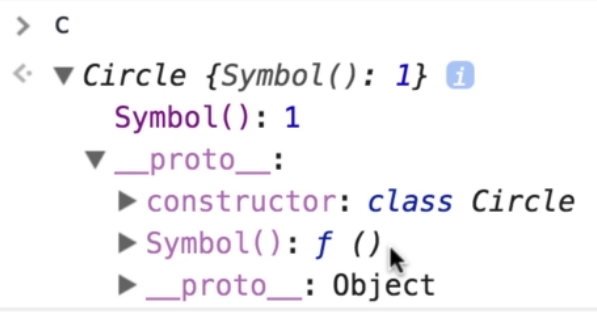

However, there is one way to **see the symbol properties** of an object.

```javascript
Object.getOwnPropertySymbols(c4).
```

# Private Members using WeakMaps (Truly Private)

A WeakMap, which is a new type introduced in ES6, can be used to implement private methods and properties in JavaScript.

A WeakMap is essentially an object where **keys must be objects**, and **values can be anything**.

It's called a WeakMap because the keys are **weakly held**—if there are no other references to the key object, it will be **automatically removed by the garbage collector**.

Technically, someone could access the private properties if they also have access to the WeakMap.

To prevent this, a common solution is to **store the WeakMap in a separate module** and only **export the class**, keeping the WeakMap hidden and inaccessible from outside.

In [ ]:
const _radius = new WeakMap();
const _move = new WeakMap();

class Circle{
    constructor(radius) {
        // Set the private 'radius' value for this instance
       _radius.set(this, radius); 

       // Set a private method 'move' for this instance
       _move.set(this, () => {
            console.log('move', this);
        }); 
    }

    draw() {
        // Access the private 'radius' value
        console.log(_radius.get(this)); 
        console.log("--------");
        // Call the private 'move' method
        _move.get(this)(); 
    }  
}

const c = new Circle(1);
c.draw(); 

1
--------
move Circle {}


In the `_move` WeakMap, we use an **arrow function** because arrow functions don’t have their own `this`. Instead, they inherit `this` from their **surrounding (parent) scope**.

If we used a regular function instead, `this` would refer to the **global object** (or `undefined` in strict mode, which classes use by default).

By using an arrow function, `this` refers to the **instance of the class**, which is what we want.



### Extra - My Note - (ES2022+): Using # Private Fields (Modern & Native Privacy)

In [ ]:
class BankAccount {
    #balance = 0;

    constructor(initialAmount) {
        this.#balance = initialAmount;
    }

    getBalance() {
        return this.#balance;
    }
}

const acc = new BankAccount(1000);
console.log(acc.getBalance());   // 1000
console.log(acc.#balance);  // This should throw a SyntaxError

1000
1000


# Getters and Setters



In [ ]:
const _radius = new WeakMap();

class Circle {
    constructor(radius) {
        _radius.set(this, radius); 
    }

    // Getter for radius
    get radius() {
        return _radius.get(this); 
    }

    // Setter for radius
    set radius(value) {
        if (value <= 0) {
            throw new Error('Radius must be positive');
        }
        _radius.set(this, value); 
    }
}

# Inheritance

Before classes were introduced in JavaScript, implementing inheritance required manually modifying the prototype chain and resetting the constructor function.

But with classes, inheritance is much simpler — you just need to use the **`extends`** keyword to create a subclass.

In [6]:
class Shape {
    move(){
        console.log('Shape move');
    }
}

class Circle extends Shape {
    draw() {
        console.log('Circle draw');
    }
}

const c = new Circle();
c.move(); 


Shape move


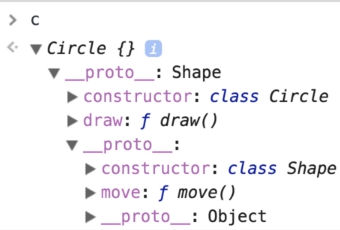

Just like in Java, in JavaScript too, **if we modify the default constructor in the superclass**, we must **first call it using `super()` in the subclass constructor** before accessing `this`.

In [8]:
class Shape {

    constructor(color){
        this.color = color;
        console.log('Shape constructor called');
    }

    move(){
        console.log('Shape move');
    }
}

class Circle extends Shape {

    constructor(radius, color) {
        super(color);// Call the parent constructor
        this.radius = radius;
        console.log('Circle constructor called');
    }

    draw() {
        console.log('Circle draw');
    }
}

const c = new Circle(1, 'red');

Shape constructor called
Circle constructor called


# Method Overriding

In [ ]:
class Shape {
    move() {
        console.log('Shape move');
    }
}

class Circle extends Shape {
    move() {
        console.log('Circle move'); 
    }
}

const c = new Circle();
c.move(); 

In this example, JavaScript will first call the `move` method defined in the child class (`Circle`) because when a method is called, JavaScript looks for it in the child class first before checking the parent class.

![alt text](image-16.jpg)

If we want to also use the parent class’s implementation of a method, we can call it using the super keyword inside the child class method.

In [9]:
class Shape {
    move() {
        console.log('Shape move');
    }
}

class Circle extends Shape {
    move() {
        super.move();
        console.log('Circle move'); 
    }
}

const c = new Circle();
c.move(); 

Shape move
Circle move
